In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, SimpleRNN
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.callbacks import *

from keras.layers import TimeDistributed
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix

df_test = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\FordA_TEST.csv")
df_train = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\FordA_TRAIN.csv")

#df_test = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\FordB_TEST.csv")
#df_train = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\ford_b_train_normalization.csv")




df_train.shape, df_test.shape

((3601, 501), (1320, 501))

데이터 가공

In [58]:
x_test = df_test.drop('target', axis=1)
y_test = df_test['target']

x_train = df_train.drop('target', axis=1)
y_train = df_train['target'] 

데이터 전처리

In [59]:
x2_train, x2_val, y2_train, y2_val = train_test_split(x_train, y_train, test_size=0.2)

In [61]:
x_train_exp = np.expand_dims(x_train, -1)
x_valid_exp = np.expand_dims(x2_val, -1)
x_test_exp = np.expand_dims(x_test, -1)


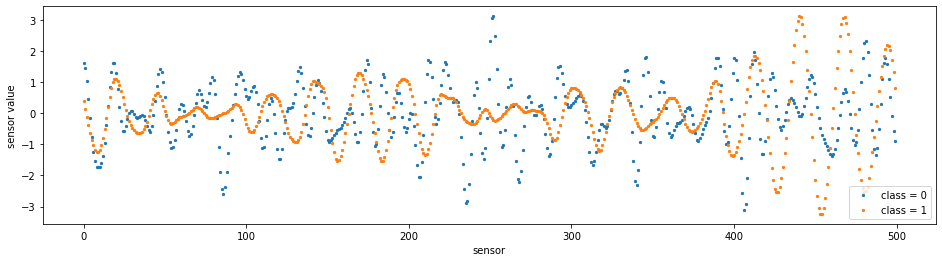

In [88]:
import random 

labels = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure(figsize = (16, 4))


# 무작위로 고른 특정 시간에서의 샘플 출력 
for c in labels:
    c_x_train = x_train[y_train == c]
    time_t = random.randint(0, c_x_train.shape[0])

    # 비정상 샘플 
    if c == 0 :
        plt.scatter(range(0, 500), c_x_train.iloc[time_t], label="class = "+str(int(c)), marker ='o', s=5)    
        #plt.plot(x_train.iloc[time_t])

    # 정상 샘플
    if c == 1 : 
        plt.scatter(range(0, 500), c_x_train.iloc[time_t], label="class = "+str(int(c)), marker ='o', s=5)    
        #plt.plot(x_train.iloc[time_t])
        
plt.legend(loc="lower right")
plt.xlabel("sensor")
plt.ylabel("sensor value")
plt.show()

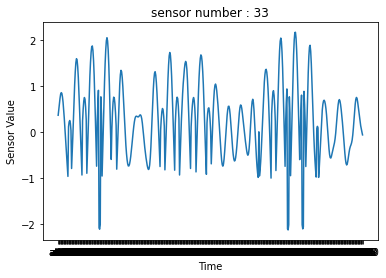

In [86]:
import random 

sensors = random.randint(0, 500)
plt.figure(figsize = (6, 4))
plt.plot(x_train.iloc[sensors])
plt.title("sensor number : " + str(sensors))
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.show()

<AxesSubplot:>

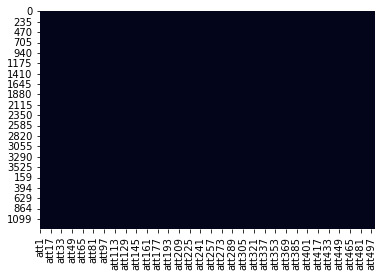

In [21]:
df_plot = pd.concat([df_train, df_test])

sns.heatmap(df_plot.isnull(), cbar=False)

데이터 모델링 

In [5]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["sparse_categorical_crossentropy"])


In [6]:
#ReduceLROnPlatea
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30, min_lr=0.001)
history_lr = model.fit(x_train_exp, y_train, batch_size=16, epochs=100, validation_data=(x_valid_exp, y2_val), callbacks=[reduce_lr], verbose=1)


Epoch 1/100
226/226 [==============================] - 2s 5ms/step - loss: 0.6547 - sparse_categorical_crossentropy: 0.6547 - val_loss: 0.4140 - val_sparse_categorical_crossentropy: 0.4140 - lr: 0.0010
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 0.4402 - sparse_categorical_crossentropy: 0.4402 - val_loss: 0.3563 - val_sparse_categorical_crossentropy: 0.3563 - lr: 0.0010
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 0.3576 - sparse_categorical_crossentropy: 0.3576 - val_loss: 0.2783 - val_sparse_categorical_crossentropy: 0.2783 - lr: 0.0010
Epoch 4/100
226/226 [==============================] - 1s 2ms/step - loss: 0.2966 - sparse_categorical_crossentropy: 0.2966 - val_loss: 0.2509 - val_sparse_categorical_crossentropy: 0.2509 - lr: 0.0010
Epoch 5/100
226/226 [==============================] - 1s 2ms/step - loss: 0.2750 - sparse_categorical_crossentropy: 0.2750 - val_loss: 0.2237 - val_sparse_categorical_crossentropy: 0.2237 - l

226/226 [==============================] - 1s 3ms/step - loss: 4.8383e-04 - sparse_categorical_crossentropy: 4.8383e-04 - val_loss: 4.2318e-04 - val_sparse_categorical_crossentropy: 4.2318e-04 - lr: 0.0010
Epoch 80/100
226/226 [==============================] - 1s 3ms/step - loss: 4.8602e-04 - sparse_categorical_crossentropy: 4.8602e-04 - val_loss: 4.4317e-04 - val_sparse_categorical_crossentropy: 4.4317e-04 - lr: 0.0010
Epoch 81/100
226/226 [==============================] - 1s 3ms/step - loss: 4.2654e-04 - sparse_categorical_crossentropy: 4.2654e-04 - val_loss: 3.5160e-04 - val_sparse_categorical_crossentropy: 3.5160e-04 - lr: 0.0010
Epoch 82/100
226/226 [==============================] - 1s 3ms/step - loss: 3.9646e-04 - sparse_categorical_crossentropy: 3.9646e-04 - val_loss: 2.9701e-04 - val_sparse_categorical_crossentropy: 2.9701e-04 - lr: 0.0010
Epoch 83/100
226/226 [==============================] - 1s 3ms/step - loss: 3.2561e-04 - sparse_categorical_crossentropy: 3.2561e-04 - va

In [7]:
#ModelCheckpoint
#"""
checkpoint_filepath = "C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\checkPoint\\"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

    
history_cp = model.fit(x_train_exp, y_train, batch_size=16, epochs=100, validation_data=(x_valid_exp, y2_val), callbacks=[model_checkpoint_callback], verbose=1)
#""" 

Epoch 1/100
226/226 [==============================] - 1s 4ms/step - loss: 6.7517e-04 - sparse_categorical_crossentropy: 6.7517e-04 - val_loss: 6.6381e-04 - val_sparse_categorical_crossentropy: 6.6381e-04
Epoch 2/100
226/226 [==============================] - 1s 4ms/step - loss: 6.1789e-04 - sparse_categorical_crossentropy: 6.1789e-04 - val_loss: 6.1620e-04 - val_sparse_categorical_crossentropy: 6.1620e-04
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 5.9902e-04 - sparse_categorical_crossentropy: 5.9902e-04 - val_loss: 5.5670e-04 - val_sparse_categorical_crossentropy: 5.5670e-04
Epoch 4/100
226/226 [==============================] - 1s 2ms/step - loss: 5.4203e-04 - sparse_categorical_crossentropy: 5.4203e-04 - val_loss: 5.2508e-04 - val_sparse_categorical_crossentropy: 5.2508e-04
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 5.0710e-04 - sparse_categorical_crossentropy: 5.0710e-04 - val_loss: 4.8426e-04 - val_sparse_categorical_

Epoch 42/100
226/226 [==============================] - 1s 4ms/step - loss: 3.7283e-04 - sparse_categorical_crossentropy: 3.7283e-04 - val_loss: 3.4654e-04 - val_sparse_categorical_crossentropy: 3.4654e-04
Epoch 43/100
226/226 [==============================] - 1s 3ms/step - loss: 3.4254e-04 - sparse_categorical_crossentropy: 3.4254e-04 - val_loss: 3.2467e-04 - val_sparse_categorical_crossentropy: 3.2467e-04
Epoch 44/100
226/226 [==============================] - 1s 3ms/step - loss: 3.1846e-04 - sparse_categorical_crossentropy: 3.1846e-04 - val_loss: 3.0021e-04 - val_sparse_categorical_crossentropy: 3.0021e-04
Epoch 45/100
226/226 [==============================] - 1s 3ms/step - loss: 2.9524e-04 - sparse_categorical_crossentropy: 2.9524e-04 - val_loss: 2.8296e-04 - val_sparse_categorical_crossentropy: 2.8296e-04
Epoch 46/100
226/226 [==============================] - 1s 4ms/step - loss: 2.8014e-04 - sparse_categorical_crossentropy: 2.8014e-04 - val_loss: 2.5634e-04 - val_sparse_categor

226/226 [==============================] - 1s 3ms/step - loss: 0.3441 - sparse_categorical_crossentropy: 0.3441 - val_loss: 0.3231 - val_sparse_categorical_crossentropy: 0.3231
Epoch 83/100
226/226 [==============================] - 1s 3ms/step - loss: 0.2100 - sparse_categorical_crossentropy: 0.2100 - val_loss: 0.0902 - val_sparse_categorical_crossentropy: 0.0902
Epoch 84/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0488 - sparse_categorical_crossentropy: 0.0488 - val_loss: 0.0194 - val_sparse_categorical_crossentropy: 0.0194
Epoch 85/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0109 - sparse_categorical_crossentropy: 0.0109 - val_loss: 0.0043 - val_sparse_categorical_crossentropy: 0.0043
Epoch 86/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0025 - sparse_categorical_crossentropy: 0.0025 - val_loss: 8.4016e-04 - val_sparse_categorical_crossentropy: 8.4016e-04
Epoch 87/100
226/226 [==============================] -

In [8]:
#EarlyStopping
#"""
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_es = model.fit(x_train_exp, y_train, batch_size=16, epochs=100, validation_data=(x_valid_exp, y2_val), callbacks=[callback], verbose=1)
#""" 

Epoch 1/100
226/226 [==============================] - 1s 4ms/step - loss: 1.2640e-04 - sparse_categorical_crossentropy: 1.2640e-04 - val_loss: 1.2422e-04 - val_sparse_categorical_crossentropy: 1.2422e-04
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 1.1968e-04 - sparse_categorical_crossentropy: 1.1968e-04 - val_loss: 1.1396e-04 - val_sparse_categorical_crossentropy: 1.1396e-04
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 1.1101e-04 - sparse_categorical_crossentropy: 1.1101e-04 - val_loss: 1.0563e-04 - val_sparse_categorical_crossentropy: 1.0563e-04
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 1.0416e-04 - sparse_categorical_crossentropy: 1.0416e-04 - val_loss: 9.8681e-05 - val_sparse_categorical_crossentropy: 9.8681e-05
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 9.7524e-05 - sparse_categorical_crossentropy: 9.7524e-05 - val_loss: 9.1640e-05 - val_sparse_categorical_

42/42 [==============================] - 0s 2ms/step


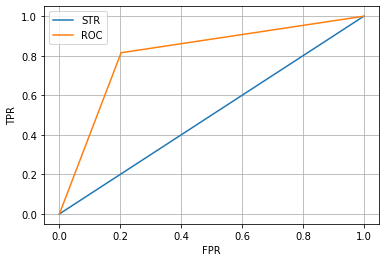

[0.         0.20264317 1.        ] [0.         0.81533646 1.        ] [2 1 0]
[0.         0.20264317 1.        ] [0.         0.81533646 1.        ] [2 1 0]


In [9]:
predict_prob = model.predict(x_test)
predict_classes = np.argmax(predict_prob, axis = 1)

fprs, tprs, thredshold = roc_curve(y_test, predict_classes)
precisions, recalls, thredsholds = roc_curve(y_test, predict_classes)
plt.plot([0,1], [0,1], label = 'STR')
plt.plot(fprs, tprs, label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()
print(fprs, tprs, thredshold)
print(precisions, recalls, thredsholds)

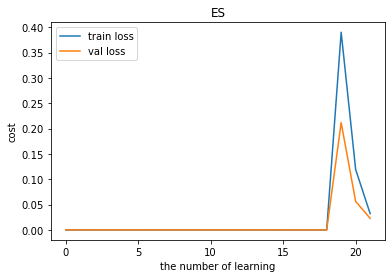

In [10]:
plt.plot(history_es.history['loss'],     label = 'train loss')
plt.plot(history_es.history['val_loss'], label = 'val loss')
plt.xlabel('the number of learning')
plt.ylabel('cost')
plt.title("ES")
plt.legend()
plt.show()

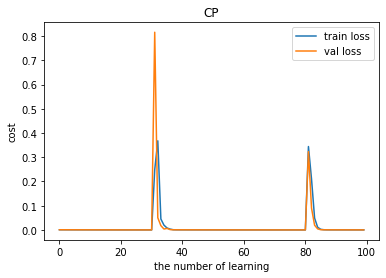

In [11]:
plt.plot(history_cp.history['loss'],     label = 'train loss')
plt.plot(history_cp.history['val_loss'], label = 'val loss')
plt.xlabel('the number of learning')
plt.ylabel('cost')
plt.title("CP")
plt.legend()
plt.show()

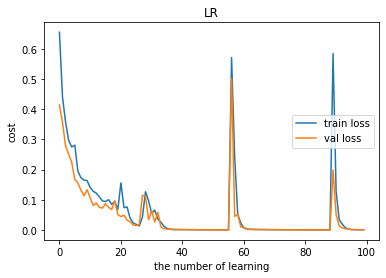

In [12]:
plt.plot(history_lr.history['loss'],     label = 'train loss')
plt.plot(history_lr.history['val_loss'], label = 'val loss')
plt.xlabel('the number of learning')
plt.ylabel('cost')
plt.title("LR")
plt.legend()
plt.show()

In [13]:
# 정확도 출력
acc = accuracy_score(y_test, predict_classes)
print('accuracy_score : ',acc)

print(classification_report(y_test, predict_classes))

accuracy_score :  0.806060606060606
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       681
           1       0.79      0.82      0.80       639

    accuracy                           0.81      1320
   macro avg       0.81      0.81      0.81      1320
weighted avg       0.81      0.81      0.81      1320



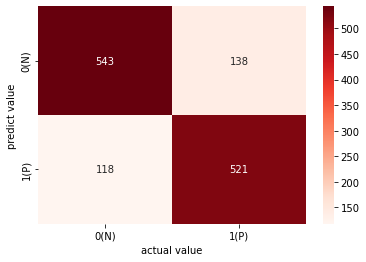

In [14]:
cm = confusion_matrix(y_test, predict_classes)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('actual value')
plt.ylabel('predict value')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

 
